In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(forestplot))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(khroma))

In [2]:
#reading files
diabetic_genet <- fread("/ictstr01/groups/itg/teams/zeggini/projects/PLIS/proteomics/differential_pQTL/T2_comparison/diabetes_vs_prediabetes/recode/new_data_for_3-unique_1-shared_pQTL/from_4_diabetes.raw")
prediabetic_genet <- fread("/ictstr01/groups/itg/teams/zeggini/projects/PLIS/proteomics/differential_pQTL/T2_comparison/diabetes_vs_prediabetes/recode/new_data_for_3-unique_1-shared_pQTL/from_5_prediabetes.raw")
npx <- fread("/ictstr01/groups/itg/teams/zeggini/projects/PLIS/proteomics/differential_pQTL/T2_comparison/diabetes_vs_prediabetes/recode/T2_NPX_diabetics_prediabetic.txt")
covariates <- fread("/ictstr01/groups/itg/teams/zeggini/projects/PLIS/proteomics/differential_pQTL/T2_comparison/diabetes_vs_prediabetes/recode/T2_prediabetics_diabetic_covariates.txt")

In [3]:
head(diabetic_genet)
head(npx)
head(covariates)

FID,IID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_T,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1400,1400,0,0,1,-9,1,0,0,2,0,1,1
1489,1489,0,0,1,-9,0,1,0,1,1,0,0
1599,1599,0,0,2,-9,0,0,1,0,0,0,1
1606,1606,0,0,2,-9,1,1,1,1,0,1,1
1652,1652,0,0,2,-9,0,2,1,1,0,0,2
2502,2502,0,0,1,-9,0,1,0,2,1,0,1


SampleID,OlinkID,NPX
<chr>,<chr>,<dbl>
Sample_709,OID20049,1.0418
Sample_1372,OID20049,1.4322
Sample_1070,OID20049,3.3083
Sample_266,OID20049,1.0342
Sample_1010,OID20049,2.9004
Sample_287,OID20049,-0.2581


SampleID,SubjectID,Age,Age2,Gender,MeanNPX,Site,storage_time,status,Group,rando
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
Sample_1362,70047,63,3969,m,0.02286598,LEI,1.71,diabetes,Hochrisiko,Lifestyle Intervention
Sample_709,20022,62,3844,m,0.09212044,DRE,3.93,prediabetes,Hochrisiko,Lifestyle Intervention
Sample_1010,40254,67,4489,w,0.12119739,Charite,1.94,prediabetes,Niedrigrisiko,No Lifestyle Intervention
Sample_728,20062,41,1681,m,0.20118297,DRE,3.78,diabetes,Hochrisiko,Intensified Lifestyle Intervention
Sample_1294,60355,60,3600,w,-0.08977184,TUM,2.07,prediabetes,Hochrisiko,Intensified Lifestyle Intervention
Sample_1372,70078,60,3600,m,0.41756693,LEI,1.34,prediabetes,Hochrisiko,Lifestyle Intervention


In [3]:
npx <- npx %>%
  left_join(covariates %>% select(SampleID, SubjectID), by = "SampleID")

In [4]:
npx <- npx %>%
  rename(IID = SubjectID)

In [5]:
#getting info on all protein-pQTLs that are unique differential pQTL in the prediabetic group (diabetic vs. prediabetic group at T2)
npx_1 <- npx[npx$OlinkID == "OID20290"]
npx_2 <- npx[npx$OlinkID == "OID20314"]
npx_3 <- npx[npx$OlinkID == "OID21425"]
npx_4 <- npx[npx$OlinkID == "OID20163"]
npx_5 <- npx[npx$OlinkID == "OID21038"]

In [6]:
npx_1_diab <- inner_join(npx_1, diabetic_genet, by = "IID")
head(npx_1_diab)

SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_T,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_1081,OID20290,0.9421,45209,45209,0,0,2,-9,0,1,0,1,0,1,1
Sample_1365,OID20290,0.2897,70056,70056,0,0,1,-9,0,1,1,1,0,0,1
Sample_792,OID20290,0.7827,20214,20214,0,0,1,-9,0,1,0,1,0,1,1
Sample_1362,OID20290,-0.8660,70047,70047,0,0,1,-9,0,1,0,1,0,1,0
Sample_1375,OID20290,0.7080,70089,70089,0,0,1,-9,1,0,0,1,0,0,1
Sample_728,OID20290,0.8447,20062,20062,0,0,1,-9,0,1,0,1,1,0,2


In [7]:
npx_1_prediab <- inner_join(npx_1, prediabetic_genet, by = "IID")
head(npx_1_prediab)

SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_G,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_709,OID20290,-0.0517,20022,20022,0,0,1,-9,0,2,1,0,1,1,0
Sample_1372,OID20290,-0.0371,70078,70078,0,0,1,-9,1,1,0,1,0,0,2
Sample_1070,OID20290,-0.7261,45233,45233,0,0,2,-9,0,1,0,0,0,1,1
Sample_266,OID20290,-1.2804,2912,2912,0,0,1,-9,1,2,0,1,0,1,0
Sample_1010,OID20290,-0.2330,40254,40254,0,0,2,-9,1,1,0,2,0,0,1
Sample_287,OID20290,0.6060,3161,3161,0,0,2,-9,1,1,1,1,0,1,1


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


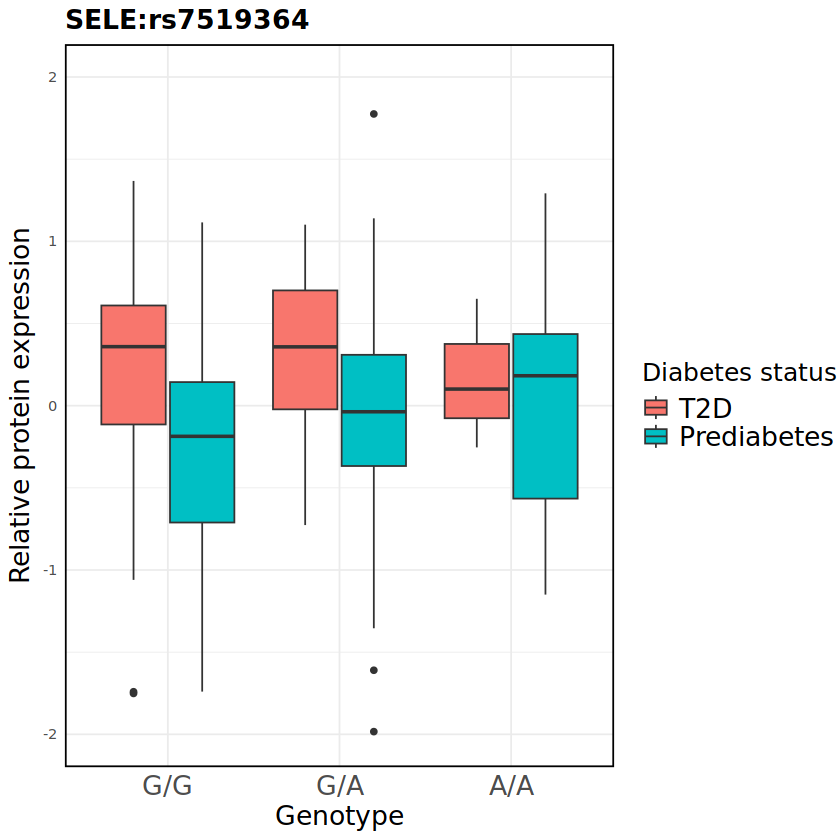

In [9]:
# Add a Group Variable for Dataset
npx_1_diab <- npx_1_diab %>% mutate(dataset = "Diabetes")
npx_1_prediab <- npx_1_prediab %>% mutate(dataset = "Prediabetes")

# Combine the Two DataFrames
combined_df <- bind_rows(npx_1_diab, npx_1_prediab)

# Create the Combined Box-and-Whisker Plot
ggplot(combined_df, aes(x = factor(`chr1:169819892_A`), y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "G/G", "1" = "G/A", "2" = "A/A")) + ylim(-2, 2) +
  labs(
    title = "SELE:rs7519364",
    x = "Genotype",
    y = "Relative protein expression",
    fill = "Diabetes status"
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),  # Title text size
    legend.text = element_text(size = 16), # Labels text size
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  )
p1 <- ggplot(combined_df, aes(x = factor(`chr1:169819892_A`), y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "G/G", "1" = "G/A", "2" = "A/A")) +
  ylim(-2, 2) +
  labs(
    title = "SELE:rs7519364",
    x = "Genotype",
    y = "Relative protein expression"
    # fill = "Diabetes status"  # ← Removed this
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),
    legend.text = element_text(size = 16),
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  ) +
  guides(fill = "none")  # ← This line removes the legend


In [10]:
npx_2_diab <- inner_join(npx_2, diabetic_genet, by = "IID")
head(npx_2_diab)
npx_2_prediab <- inner_join(npx_2, prediabetic_genet, by = "IID")
head(npx_2_prediab)

SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_T,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_1081,OID20314,0.0492,45209,45209,0,0,2,-9,0,1,0,1,0,1,1
Sample_1365,OID20314,0.2751,70056,70056,0,0,1,-9,0,1,1,1,0,0,1
Sample_792,OID20314,-0.7706,20214,20214,0,0,1,-9,0,1,0,1,0,1,1
Sample_1362,OID20314,-0.0886,70047,70047,0,0,1,-9,0,1,0,1,0,1,0
Sample_1375,OID20314,0.5458,70089,70089,0,0,1,-9,1,0,0,1,0,0,1
Sample_728,OID20314,0.1456,20062,20062,0,0,1,-9,0,1,0,1,1,0,2


SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_G,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_709,OID20314,0.0508,20022,20022,0,0,1,-9,0,2,1,0,1,1,0
Sample_1372,OID20314,0.3307,70078,70078,0,0,1,-9,1,1,0,1,0,0,2
Sample_1070,OID20314,-0.1902,45233,45233,0,0,2,-9,0,1,0,0,0,1,1
Sample_266,OID20314,-0.1041,2912,2912,0,0,1,-9,1,2,0,1,0,1,0
Sample_1010,OID20314,-0.1006,40254,40254,0,0,2,-9,1,1,0,2,0,0,1
Sample_287,OID20314,-0.2243,3161,3161,0,0,2,-9,1,1,1,1,0,1,1


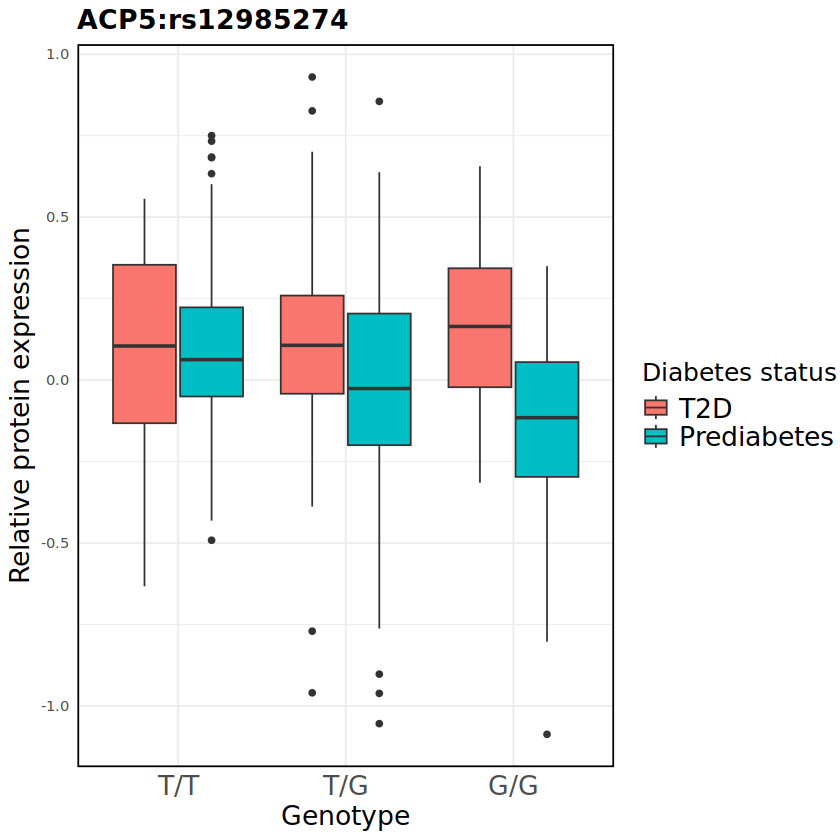

In [11]:
# Add a Group Variable for Dataset
npx_2_diab <- npx_2_diab %>% mutate(dataset = "Diabetes")
npx_2_prediab <- npx_2_prediab %>% mutate(dataset = "Prediabetes")
npx_2_diab <- npx_2_diab %>%
  rename(`chr19:11720267_G` = `chr19:11720267_T`)
# Combine the Two DataFrames
combined_df <- bind_rows(npx_2_diab, npx_2_prediab)

# Create the Combined Box-and-Whisker Plot
ggplot(combined_df, aes(x = factor(`chr19:11720267_G`), y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "T/T", "1" = "T/G", "2" = "G/G")) + #ylim(-2, 2) +
  labs(
    title = "ACP5:rs12985274",
    x = "Genotype",
    y = "Relative protein expression",
    fill = "Diabetes status"
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),  # Title text size
    legend.text = element_text(size = 16), # Labels text size
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  )
p2 <- ggplot(combined_df, aes(x = factor(`chr19:11720267_G`), y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "T/T", "1" = "T/G", "2" = "G/G")) + #ylim(-2, 2) +
  labs(
    title = "ACP5:rs12985274",
    x = "Genotype",
    y = "Relative protein expression",
    #fill = "Diabetes status"
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),  # Title text size
    legend.text = element_text(size = 16), # Labels text size
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  ) +
  guides(fill = "none")  # ← This line removes the legend

In [12]:
npx_3_diab <- inner_join(npx_3, diabetic_genet, by = "IID")
head(npx_3_diab)
npx_3_prediab <- inner_join(npx_3, prediabetic_genet, by = "IID")
head(npx_3_prediab)

SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_T,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_1081,OID21425,0.0515,45209,45209,0,0,2,-9,0,1,0,1,0,1,1
Sample_1365,OID21425,0.1830,70056,70056,0,0,1,-9,0,1,1,1,0,0,1
Sample_792,OID21425,-0.5564,20214,20214,0,0,1,-9,0,1,0,1,0,1,1
Sample_1362,OID21425,-0.1805,70047,70047,0,0,1,-9,0,1,0,1,0,1,0
Sample_1375,OID21425,0.2157,70089,70089,0,0,1,-9,1,0,0,1,0,0,1
Sample_728,OID21425,0.1506,20062,20062,0,0,1,-9,0,1,0,1,1,0,2


SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_G,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_709,OID21425,0.0562,20022,20022,0,0,1,-9,0,2,1,0,1,1,0
Sample_1372,OID21425,0.1650,70078,70078,0,0,1,-9,1,1,0,1,0,0,2
Sample_1070,OID21425,-0.2066,45233,45233,0,0,2,-9,0,1,0,0,0,1,1
Sample_266,OID21425,-0.2159,2912,2912,0,0,1,-9,1,2,0,1,0,1,0
Sample_1010,OID21425,-0.5978,40254,40254,0,0,2,-9,1,1,0,2,0,0,1
Sample_287,OID21425,0.0766,3161,3161,0,0,2,-9,1,1,1,1,0,1,1


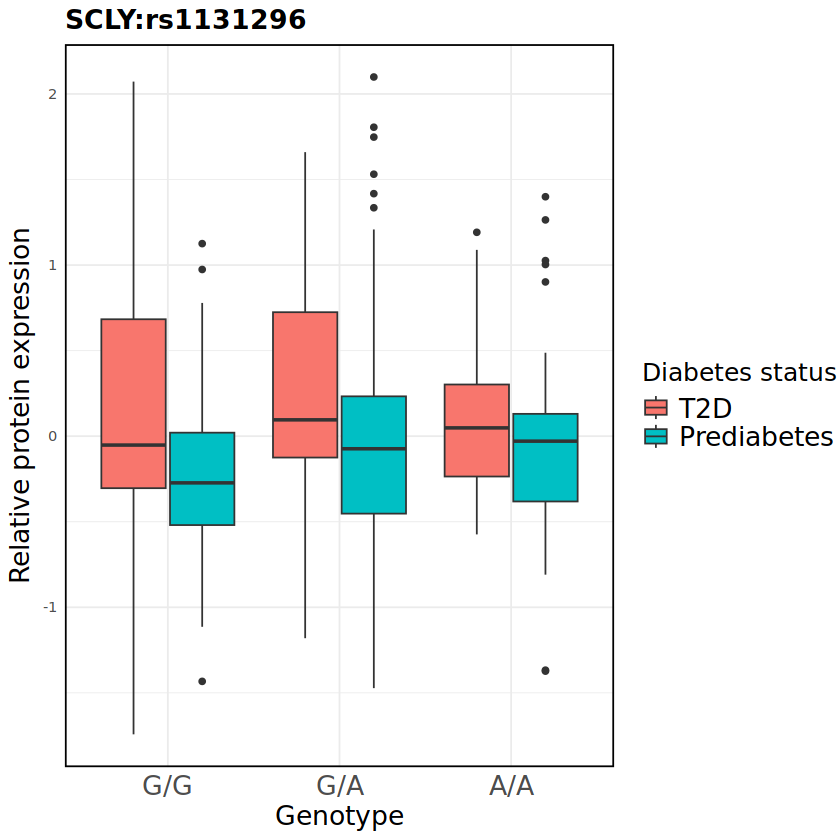

In [51]:
# Add a Group Variable for Dataset
npx_3_diab <- npx_3_diab %>% mutate(dataset = "Diabetes")
npx_3_prediab <- npx_3_prediab %>% mutate(dataset = "Prediabetes")

# Combine the Two DataFrames
combined_df <- bind_rows(npx_3_diab, npx_3_prediab)

# Create the Combined Box-and-Whisker Plot
ggplot(combined_df, aes(x = factor(`chr2:238243292_A`), y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "G/G", "1" = "G/A", "2" = "A/A")) + #ylim(-2, 2) +
  labs(
    title = "SCLY:rs1131296",
    x = "Genotype",
    y = "Relative protein expression",
    fill = "Diabetes status"
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),  # Title text size
    legend.text = element_text(size = 16), # Labels text size
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  )
p3 <- ggplot(combined_df, aes(x = factor(`chr2:238243292_A`), y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "G/G", "1" = "G/A", "2" = "A/A")) + #ylim(-2, 2) +
  labs(
    title = "SCLY:rs1131296",
    x = "Genotype",
    y = "Relative protein expression",
    fill = "Outcome group"
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),  # Title text size
    legend.text = element_text(size = 16), # Labels text size
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  )

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


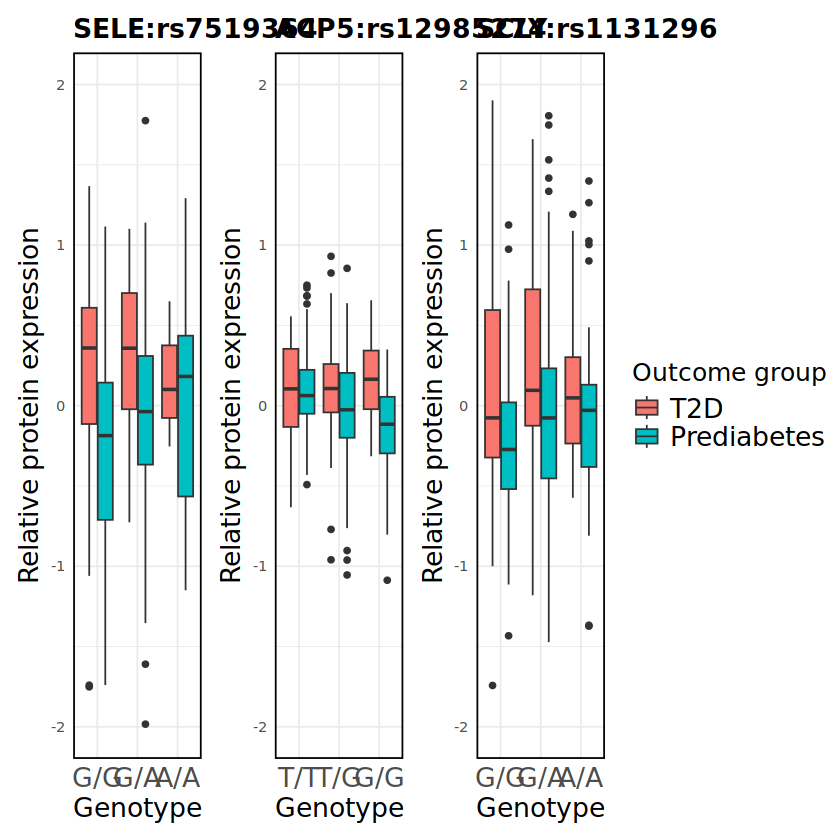

In [52]:
# Set y-axis limits for each plot
p1 <- p1 + ylim(-2, 2)
p2 <- p2 + ylim(-2, 2)
p3 <- p3 + ylim(-2, 2)

# Combine plots
combined_plot <- p1 + p2 + p3 + plot_layout(ncol = 3)
print(combined_plot)
ggsave("/ictstr01/groups/itg/teams/zeggini/projects/PLIS/proteomics/differential_pQTL/T2_comparison/diabetes_vs_prediabetes/plots/differential_pQTL_differentially_expressed_in_prediabetes.pdf", combined_plot, width = 12, height = 7)

In [8]:
npx_4_diab <- inner_join(npx_4, diabetic_genet, by = "IID")
head(npx_4_diab)
npx_4_prediab <- inner_join(npx_4, prediabetic_genet, by = "IID")
head(npx_4_prediab)

SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_T,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_1081,OID20163,0.3441,45209,45209,0,0,2,-9,0,1,0,1,0,1,1
Sample_1365,OID20163,-0.9023,70056,70056,0,0,1,-9,0,1,1,1,0,0,1
Sample_792,OID20163,0.1160,20214,20214,0,0,1,-9,0,1,0,1,0,1,1
Sample_1362,OID20163,0.0136,70047,70047,0,0,1,-9,0,1,0,1,0,1,0
Sample_1375,OID20163,-0.1949,70089,70089,0,0,1,-9,1,0,0,1,0,0,1
Sample_728,OID20163,-0.3145,20062,20062,0,0,1,-9,0,1,0,1,1,0,2


SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_G,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_709,OID20163,-1.3654,20022,20022,0,0,1,-9,0,2,1,0,1,1,0
Sample_1372,OID20163,0.1129,70078,70078,0,0,1,-9,1,1,0,1,0,0,2
Sample_1070,OID20163,0.0320,45233,45233,0,0,2,-9,0,1,0,0,0,1,1
Sample_266,OID20163,0.3397,2912,2912,0,0,1,-9,1,2,0,1,0,1,0
Sample_1010,OID20163,0.0520,40254,40254,0,0,2,-9,1,1,0,2,0,0,1
Sample_287,OID20163,-1.0627,3161,3161,0,0,2,-9,1,1,1,1,0,1,1


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Saving 7 x 7 in image


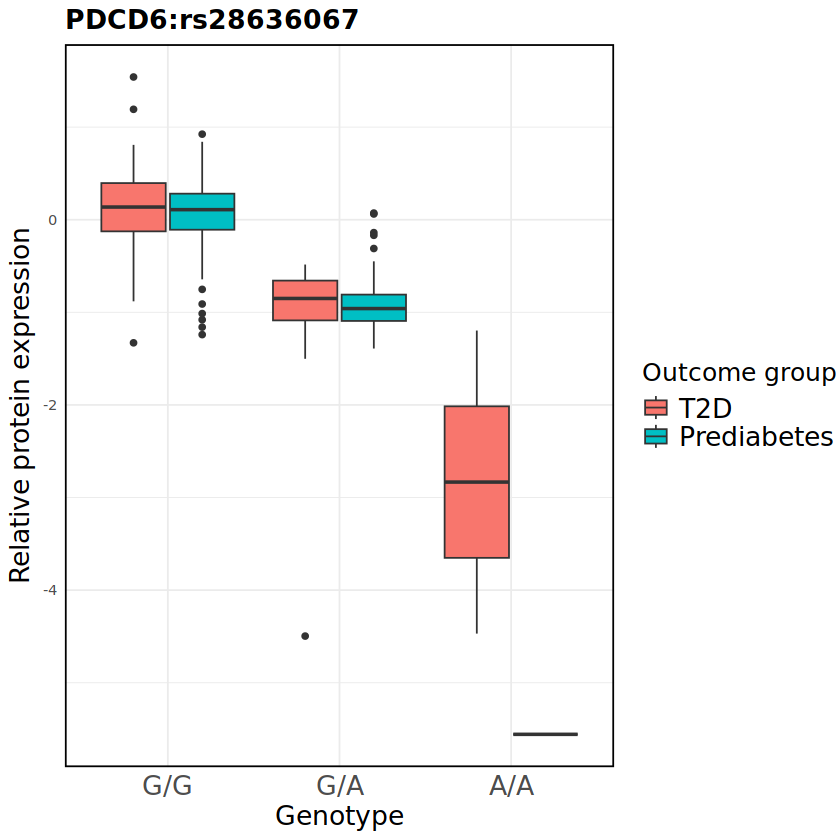

In [9]:
# Add a Group Variable for Dataset
npx_4_diab <- npx_4_diab %>% mutate(dataset = "Diabetes")
npx_4_prediab <- npx_4_prediab %>% mutate(dataset = "Prediabetes")

# Combine the Two DataFrames
combined_df <- bind_rows(npx_4_diab, npx_4_prediab)
combined_df$`chr5:199415_A` <- factor(
  combined_df$`chr5:199415_A`,
  levels = c("0", "1", "2")   # Force all three genotypes
)
# Create the Combined Box-and-Whisker Plot
ggplot(combined_df, aes(x = factor(`chr5:199415_A`), y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "G/G", "1" = "G/A", "2" = "A/A")) + #ylim(-2, 2) +
  labs(
    title = "PDCD6:rs28636067",
    x = "Genotype",
    y = "Relative protein expression",
    fill = "Outcome group"
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),  # Title text size
    legend.text = element_text(size = 16), # Labels text size
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  )


p4 <- ggplot(combined_df, aes(x = `chr5:199415_A`, y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "G/G", "1" = "G/A", "2" = "A/A")) +
  coord_cartesian(ylim = c(-5, 2)) +   # optional y-axis limits
  labs(
    title = "PDCD6:rs28636067",
    x = "Genotype",
    y = "Relative protein expression",
    fill = "Outcome group"
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),
    legend.text = element_text(size = 16),
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  )

ggsave("/ictstr01/groups/itg/teams/zeggini/projects/PLIS/proteomics/differential_pQTL/T2_comparison/diabetes_vs_prediabetes/plots/top-shared_pQTL_prediabetes_T2D.pdf", p4)

In [11]:
npx_5_diab <- inner_join(npx_5, diabetic_genet, by = "IID")
head(npx_5_diab)
npx_5_prediab <- inner_join(npx_5, prediabetic_genet, by = "IID")
head(npx_5_prediab)

SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_T,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_1081,OID21038,-0.5410,45209,45209,0,0,2,-9,0,1,0,1,0,1,1
Sample_1365,OID21038,-0.1429,70056,70056,0,0,1,-9,0,1,1,1,0,0,1
Sample_792,OID21038,0.1991,20214,20214,0,0,1,-9,0,1,0,1,0,1,1
Sample_1362,OID21038,-0.9728,70047,70047,0,0,1,-9,0,1,0,1,0,1,0
Sample_1375,OID21038,0.2174,70089,70089,0,0,1,-9,1,0,0,1,0,0,1
Sample_728,OID21038,-0.5411,20062,20062,0,0,1,-9,0,1,0,1,1,0,2


SampleID,OlinkID,NPX,IID,FID,PAT,MAT,SEX,PHENOTYPE,chr1:169819892_A,chr2:238243292_A,chr5:199415_A,chr19:11720267_G,chr19:45408628_C,chr20:5911963_G,chr22:38053665_T
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample_709,OID21038,0.1615,20022,20022,0,0,1,-9,0,2,1,0,1,1,0
Sample_1372,OID21038,-0.1656,70078,70078,0,0,1,-9,1,1,0,1,0,0,2
Sample_1070,OID21038,0.3422,45233,45233,0,0,2,-9,0,1,0,0,0,1,1
Sample_266,OID21038,0.4869,2912,2912,0,0,1,-9,1,2,0,1,0,1,0
Sample_1010,OID21038,0.8889,40254,40254,0,0,2,-9,1,1,0,2,0,0,1
Sample_287,OID21038,-1.0736,3161,3161,0,0,2,-9,1,1,1,1,0,1,1


Saving 7 x 7 in image


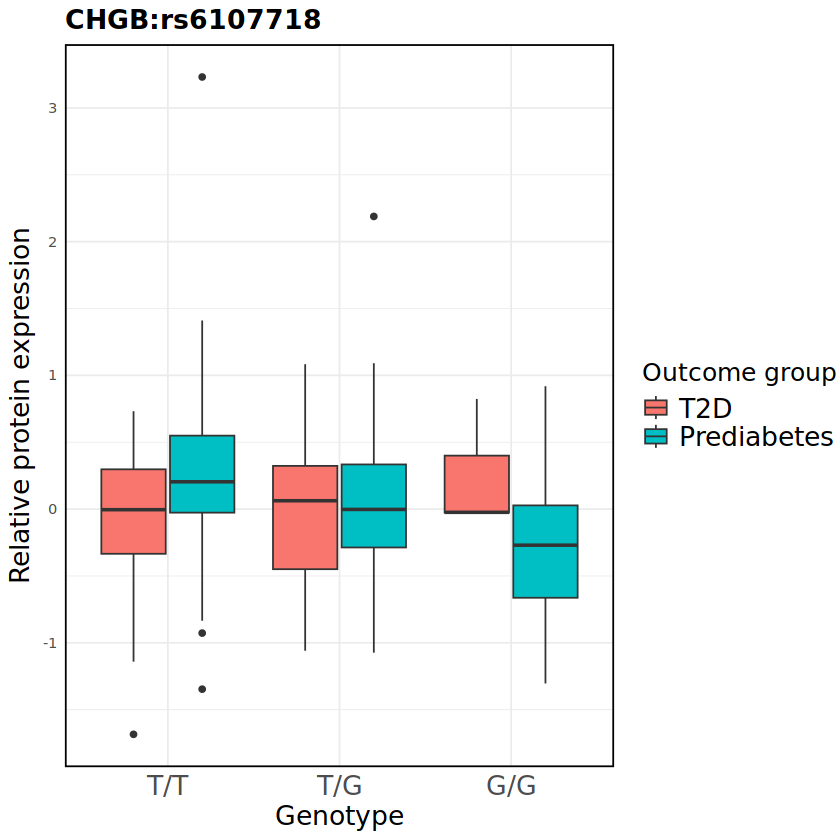

In [13]:
# Add a Group Variable for Dataset
npx_5_diab <- npx_5_diab %>% mutate(dataset = "Diabetes")
npx_5_prediab <- npx_5_prediab %>% mutate(dataset = "Prediabetes")

# Combine the Two DataFrames
combined_df <- bind_rows(npx_5_diab, npx_5_prediab)

# Create the Combined Box-and-Whisker Plot
ggplot(combined_df, aes(x = factor(`chr20:5911963_G`), y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "T/T", "1" = "T/G", "2" = "G/G")) + #ylim(-2, 2) +
  labs(
    title = "CHGB:rs6107718",
    x = "Genotype",
    y = "Relative protein expression",
    fill = "Outcome group"
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),  # Title text size
    legend.text = element_text(size = 16), # Labels text size
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  )
p5 <- ggplot(combined_df, aes(x = factor(`chr20:5911963_G`), y = NPX, fill = dataset)) +
  geom_boxplot(position = position_dodge(width = 0.8)) +
  theme_minimal() +
  scale_fill_discrete(labels = c("T2D", "Prediabetes")) +
  scale_x_discrete(labels = c("0" = "T/T", "1" = "T/G", "2" = "G/G")) + #ylim(-2, 2) +
  labs(
    title = "CHGB:rs6107718",
    x = "Genotype",
    y = "Relative protein expression",
    fill = "Outcome group"
  ) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 15),  # Title text size
    legend.text = element_text(size = 16), # Labels text size
    panel.border = element_rect(colour = "black", fill = NA, size = 1)
  )
ggsave("/ictstr01/groups/itg/teams/zeggini/projects/PLIS/proteomics/differential_pQTL/T2_comparison/diabetes_vs_prediabetes/plots/top-differential_pQTL_prediabetes_T2D.pdf", p5)

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


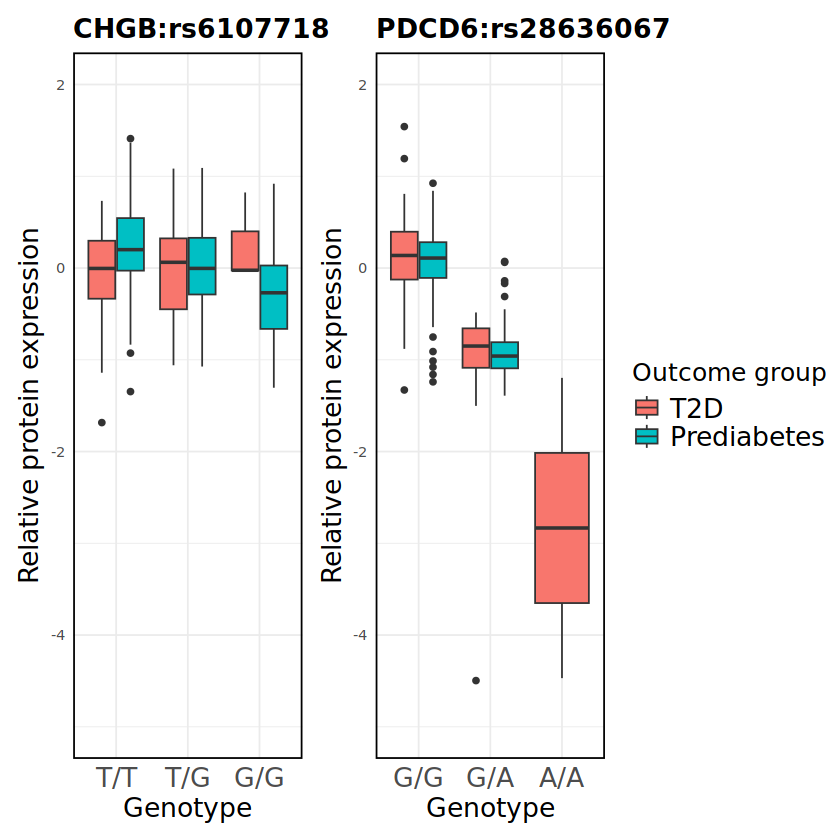

In [55]:
# Set y-axis limits for each plot
p4 <- p4 + ylim(-5, 2)
p5 <- p5 + ylim(-5, 2)
# Combine plots
combined_plot <- p5 + p4 + plot_layout(ncol = 2)
print(combined_plot)
ggsave("/ictstr01/groups/itg/teams/zeggini/projects/PLIS/proteomics/differential_pQTL/T2_comparison/diabetes_vs_prediabetes/plots/differential_shared_pQTL_prediabetes-T2D.pdf", combined_plot, width = 12, height = 7)